## Autoencoders

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from keras.layers import Input, Dense
from keras.models import Model

In [12]:
from keras.datasets import mnist

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))



In [14]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


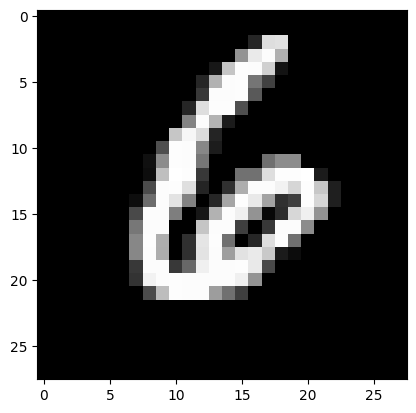

In [16]:
plt.imshow(x_train[13])
plt.gray()

# Building the autoencoder

![](https://www.researchgate.net/profile/Xifeng-Guo/publication/320658590/figure/fig1/AS:614154637418504@1523437284408/The-structure-of-proposed-Convolutional-AutoEncoders-CAE-for-MNIST-In-the-middle-there.png)

https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import keras
from keras import layers

2023-07-21 14:10:26.446438: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 14:10:26.626195: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-21 14:10:26.650988: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-21 14:10:26.651001: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
input_img = keras.Input(shape=(28, 28, 1))

In [3]:
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

2023-07-21 14:10:29.526746: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-21 14:10:29.526763: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-21 14:10:29.526777: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alabarga-Latitude-7420): /proc/driver/nvidia/version does not exist
2023-07-21 14:10:29.527400: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:


x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)

decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [5]:
autoencoder = keras.Model(input_img, decoded)



In [6]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

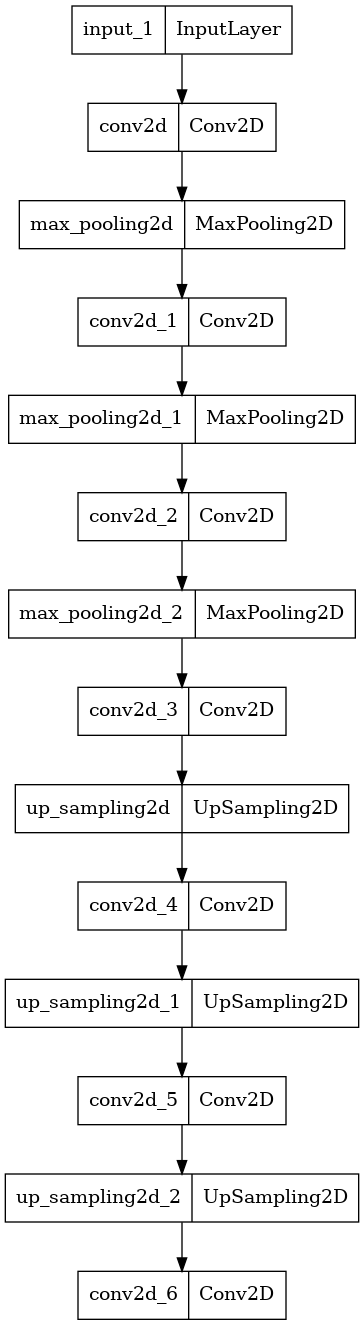

In [7]:
from keras.utils import plot_model
plot_model(autoencoder)

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## Train

In [17]:
# Activate login
# tensorboard --logdir=/tmp/autoencoder


In [18]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])


Epoch 1/100
469/469 [==============================] - 7s 13ms/step - loss: 0.6794 - val_loss: 0.6747
Epoch 2/100
469/469 [==============================] - 6s 13ms/step - loss: 0.6669 - val_loss: 0.6568
Epoch 3/100
469/469 [==============================] - 9s 18ms/step - loss: 0.6391 - val_loss: 0.6157
Epoch 4/100
469/469 [==============================] - 9s 19ms/step - loss: 0.5775 - val_loss: 0.5375
Epoch 5/100
469/469 [==============================] - 9s 19ms/step - loss: 0.5107 - val_loss: 0.4995
Epoch 6/100
469/469 [==============================] - 9s 18ms/step - loss: 0.4916 - val_loss: 0.4910
Epoch 7/100
469/469 [==============================] - 8s 18ms/step - loss: 0.4842 - val_loss: 0.4842
Epoch 8/100
469/469 [==============================] - 8s 18ms/step - loss: 0.4776 - val_loss: 0.4777
Epoch 9/100
469/469 [==============================] - 9s 18ms/step - loss: 0.4712 - val_loss: 0.4714
Epoch 10/100
469/469 [==============================] - 9s 19ms/step - loss: 0.464

469/469 [==============================] - 8s 18ms/step - loss: 0.2052 - val_loss: 0.2049
Epoch 81/100
469/469 [==============================] - 9s 18ms/step - loss: 0.2047 - val_loss: 0.2045
Epoch 82/100
469/469 [==============================] - 8s 17ms/step - loss: 0.2043 - val_loss: 0.2040
Epoch 83/100
469/469 [==============================] - 8s 17ms/step - loss: 0.2039 - val_loss: 0.2036
Epoch 84/100
469/469 [==============================] - 8s 17ms/step - loss: 0.2035 - val_loss: 0.2032
Epoch 85/100
469/469 [==============================] - 9s 18ms/step - loss: 0.2031 - val_loss: 0.2029
Epoch 86/100
469/469 [==============================] - 9s 19ms/step - loss: 0.2027 - val_loss: 0.2025
Epoch 87/100
469/469 [==============================] - 9s 19ms/step - loss: 0.2024 - val_loss: 0.2021
Epoch 88/100
469/469 [==============================] - 9s 19ms/step - loss: 0.2020 - val_loss: 0.2017
Epoch 89/100
469/469 [==============================] - 9s 19ms/step - loss: 0.2016 - 

In [50]:
reconstructed = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [52]:
encoder = keras.Model(input_img, encoded)
embeddings = encoder.predict(x_test)

313/313 [==============================] - 0s 881us/step


In [53]:
embeddings[0].shape

(4, 4, 8)

In [54]:
reconstructed[0].shape

(28, 28, 1)

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

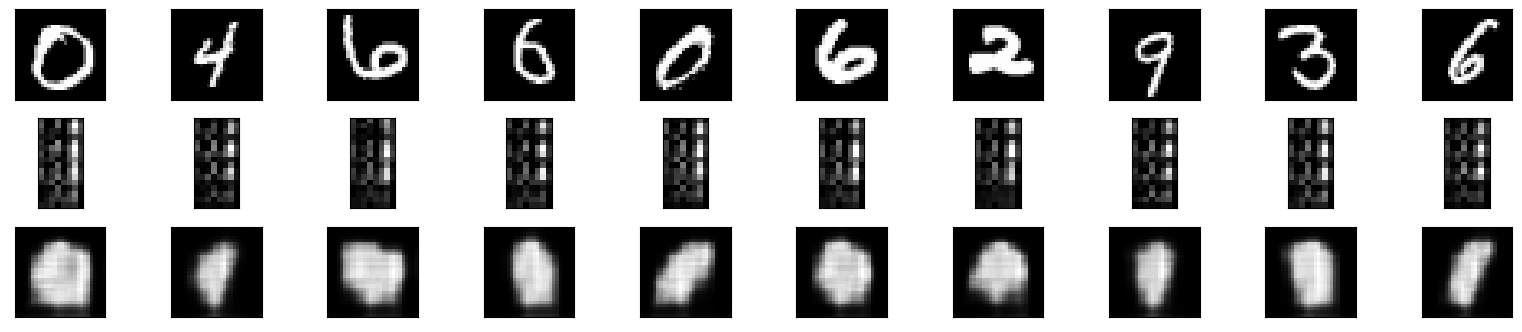

In [59]:
plt.figure(figsize=(40, 4))

sample = np.random.randint(0,10000,10)

for i in range(10):
    im = sample[i]
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[im].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(embeddings[im].reshape(16,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    
    
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(reconstructed[im].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    
plt.show()

In [55]:
import umap

In [70]:
import seaborn as sns
from matplotlib.colors import ListedColormap

In [71]:
%%time
reducer = umap.UMAP(random_state=42)


CPU times: user 8.23 ms, sys: 16 µs, total: 8.25 ms
Wall time: 8.36 ms


In [ ]:
embedding2D = reducer.fit_transform(embeddings)

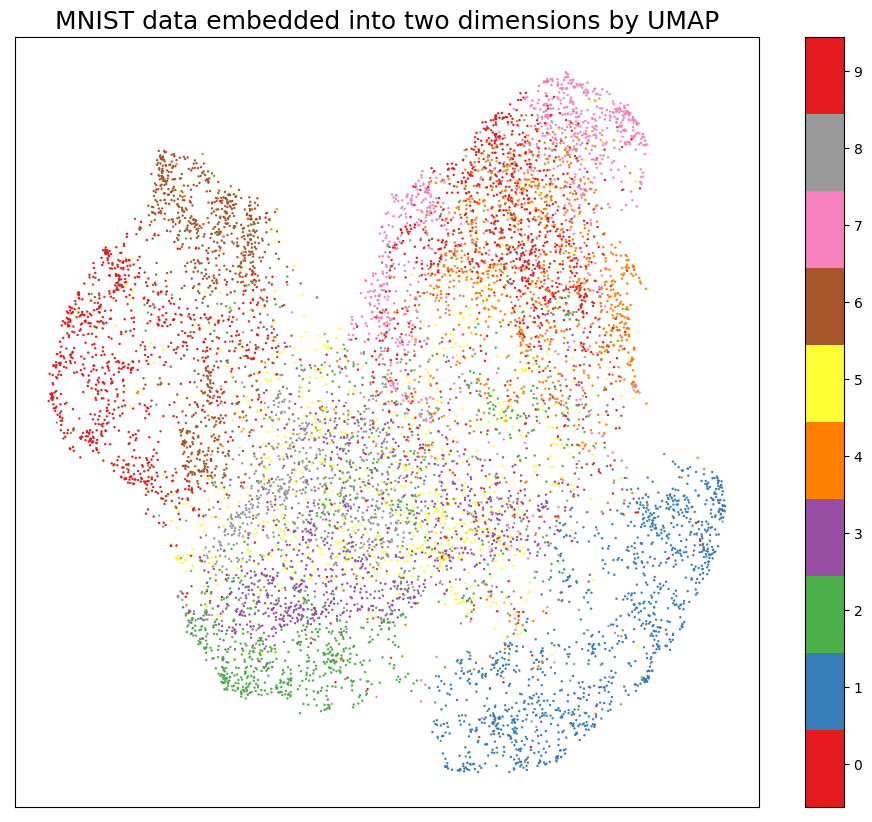

In [92]:
fig, ax = plt.subplots(figsize=(12, 10))
color = y_test

# Define the finite color values and corresponding labels
labels = [str(i) for i in range(10)]

# Create a palette using Seaborn's color_palette() function
palette = sns.color_palette('Set1', n_colors=10)
cmap = ListedColormap(palette)

plt.scatter(embedding2D[:, 0], embedding2D[:, 1], c=color, cmap=cmap, s=0.5)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=18)

# Create the colorbar
cbar = plt.colorbar()
tick_positions = 0.5 + np.arange(len(labels)) - np.arange(len(labels)) / 10
cbar.set_ticks(tick_positions)
cbar.set_ticklabels(labels)


plt.show()

In [93]:
embedding2D = reducer.fit_transform(X_test)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
color = y_test

# Define the finite color values and corresponding labels
labels = [str(i) for i in range(10)]

# Create a palette using Seaborn's color_palette() function
palette = sns.color_palette('Set1', n_colors=10)
cmap = ListedColormap(palette)

plt.scatter(embedding2D[:, 0], embedding2D[:, 1], c=color, cmap=cmap, s=0.5)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=18)

# Create the colorbar
cbar = plt.colorbar()
tick_positions = 0.5 + np.arange(len(labels)) - np.arange(len(labels)) / 10
cbar.set_ticks(tick_positions)
cbar.set_ticklabels(labels)


plt.show()